In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [17]:
%cd ..
%cd Coursera/Coursera/CSVs/

C:\Users\AMOS OSHIYOYE\Documents\VSCODE_user_files
C:\Users\AMOS OSHIYOYE\Documents\VSCODE_user_files\Coursera\Coursera\CSVs


In [18]:
df=pd.read_csv('ChicagoPublicSchools.csv')

In [28]:
for a in df.drop('COMMUNITY_AREA_NAME',axis=1).columns:
    if df[a].dtypes=='object' and df[a].str.contains('NDA').any() and (df[a].value_counts()['NDA']>(df.shape[0]/2)):
        df_nnda=df.drop([a],axis=1)

In [77]:
df['AVERAGE_STUDENT_ATTENDANCE']=df['AVERAGE_STUDENT_ATTENDANCE'].apply(lambda x: float(str(x).strip('%')))
df['Average_Teacher_Attendance']=df['Average_Teacher_Attendance'].apply(lambda x: float(str(x).strip('%')))

In [20]:
zip_sch_type=df.groupby('ZIP_Code')['Elementary, Middle, or High School'].value_counts(sort=False)
zip_safety=df.groupby('ZIP_Code')['SAFETY_SCORE'].mean()
zip_avg_att=df.groupby('ZIP_Code')['AVERAGE_STUDENT_ATTENDANCE'].mean()
zip_center=df.groupby('ZIP_Code')['Latitude','Longitude'].mean().reset_index()
chicago_midpoint=df.loc[:,['Latitude','Longitude']].mean()
# zip_center

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_808\2522552395.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zip_center=df.groupby('ZIP_Code')['Latitude','Longitude'].mean().reset_index()


In [21]:
import folium
from folium import DivIcon,plugins

In [99]:
df["Adequate_Yearly_Progress_Made_"].value_counts()

No     476
Yes     72
NDA     18
Name: Adequate_Yearly_Progress_Made_, dtype: int64

In [22]:
# lap=df.groupby(['ZIP_Code'])['Latitude','Longitude'].transform('median')
# lap.rename(columns={'Latitude':'Latitude_','Longitude':'Longitude_'}
# df['Latitude_']=lap.iloc[:,0]
df[['Latitude_','Longitude_']]=df.groupby(['ZIP_Code'])['Latitude','Longitude'].transform('median')

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_808\1374897365.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['Latitude_','Longitude_']]=df.groupby(['ZIP_Code'])['Latitude','Longitude'].transform('median')


%cd ..
%cd ..
%cd ..
%cd "Chicago Schools"

In [24]:
sch_map=folium.Map(location=chicago_midpoint,zoom_start=10,tiles='OpenStreetMap')
clusters=plugins.MarkerCluster().add_to(sch_map)
for i, rows in df.iterrows():
    lat=df.at[i,'Latitude_']
    long=df.at[i,'Longitude_']
    folium.Circle(location=[lat,long],radius=200,color='purple',).add_to(sch_map)
for i,row in df.iterrows():
    lat=df.at[i,'Latitude']
    long=df.at[i,'Longitude']
    name=df.at[i,'NAME_OF_SCHOOL']
    type_=df.at[i,'Elementary, Middle, or High School']
    web=df.at[i,'Link']
   
# str.find(df.at[i,'NAME_OF_SCHOOL'],'Lang')
    if type_=='ES':
        type_='Elementary Schools'
        color_='darkblue'
    elif type_=='MS':
        color_='darkred'
        type_='Middle School'
    elif type=='HS':
        type_='High School'
        color_='darkgreen'
    else:
        type_='Others'
    def sch_special():
        if str.find(df.at[i,'NAME_OF_SCHOOL'],'Lang')!=-1:
            icon_='globe'
        else:
            icon_='book'
        return icon_
            
    pop_up= "<div style='background-color:grey;color:white;'>"+name+'<br> School Type: '+type_ + '<br> ' + str(web) + '<br></div>'
    folium.Marker(location=[lat,long],tooltip=name,popup=pop_up,icon=folium.Icon(icon=sch_special(),icon_color=color_,prefix='glyphicon',icon_size=(2,2),icon_anchor=(0,0))).add_to(clusters)
    # 
folium.Circle(location=chicago_midpoint, radius=400,tooltip="Proposed Site for the Chicago Central Library", color='black',fill=True,fill_color='lightblue').add_to(sch_map)
# folium.Marker(location=chicago_midpoint,,icon=folium.Icon(icon_size=(5,5))).add_to(sch_map)
sch_map.save('index.html')
sch_map

In [26]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [27]:
for a,b in df.iterrows():
    lat_z=df.at[a,'Latitude_']
    long_z=df.at[a,'Longitude_']
    lat=df.at[a,'Latitude']
    long=df.at[a,'Longitude']
    distance_=calculate_distance(lat,long,lat_z,long_z)
    folium.Marker([lat,long],
    icon=DivIcon(
    icon_size=(20,20),
    icon_anchor=(0,0),
    html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_),
    )
    ).add_to(sch_map)
    folium.Polygon([[lat_z,long_z],[lat,long]]).add_to(sch_map)

sch_map.save('index.html')
# df['Latitude_']

In [65]:
safety_=df.loc[:,df.columns.str.contains('[Ss][Aa][Ff]')]

In [124]:
df.columns

Index(['School_ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street_Address', 'City', 'State', 'ZIP_Code', 'Phone_Number', 'Link',
       'Network_Manager', 'Collaborative_Name',
       'Adequate_Yearly_Progress_Made_', 'Track_Schedule',
       'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety_Icon', 'SAFETY_SCORE',
       'Family_Involvement_Icon', 'Family_Involvement_Score',
       'Environment_Icon', 'Environment_Score', 'Instruction_Icon',
       'Instruction_Score', 'Leaders_Icon', 'Leaders_Score', 'Teachers_Icon',
       'Teachers_Score', 'Parent_Engagement_Icon', 'Parent_Engagement_Score',
       'Parent_Environment_Icon', 'Parent_Environment_Score',
       'AVERAGE_STUDENT_ATTENDANCE', 'Rate_of_Misconducts__per_100_students_',
       'Average_Teacher_Attendance',
       'Individualized_Education_Program_Compliance_Rate', 'Pk_2_Literacy__',
       'Pk_2_Math__', 'Gr3_5_Grade_Level_Math__', 'Gr3_5_Gr

In [96]:
for col in df.iloc[:,df.columns.str.contains('[Pp][Aa][Rr]')].columns:
    print(df[col].value_counts())
# df['Average_Teacher_Attendance'].

Average    248
NDA        134
Weak        96
Strong      88
Name: Parent_Engagement_Icon, dtype: int64
NDA    134
52      40
50      40
47      38
49      36
48      35
46      33
51      30
53      29
45      18
55      18
56      17
44      15
58      11
43      11
57       9
54       9
42       8
59       5
60       4
40       4
41       4
66       3
39       2
69       2
68       2
61       2
63       2
62       2
65       1
37       1
64       1
Name: Parent_Engagement_Score, dtype: int64
Average    239
NDA        134
Strong     102
Weak        91
Name: Parent_Environment_Icon, dtype: int64
NDA    134
47      42
49      40
51      38
46      32
50      32
48      31
52      30
53      26
54      25
55      25
45      17
44      15
43      12
57      11
58      11
56      10
60       6
41       5
59       4
42       3
63       3
61       2
65       2
38       2
31       1
70       1
39       1
36       1
40       1
37       1
64       1
62       1
Name: Parent_Environment_Score, dt

In [123]:
df[(df['Elementary, Middle, or High School']=='MS') & (df['HEALTHY_SCHOOL_CERTIFIED']=='YES')]

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location,Latitude_,Longitude_


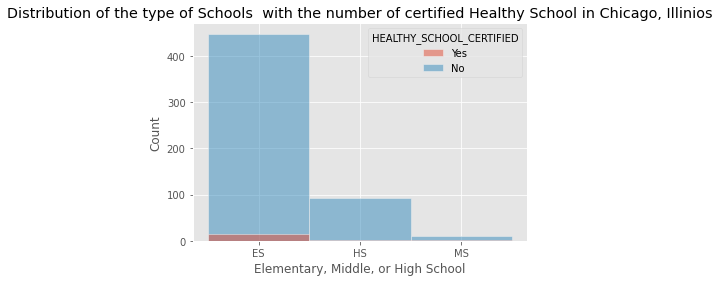

In [121]:
ax=sns.histplot(data=df,x='Elementary, Middle, or High School',hue='HEALTHY_SCHOOL_CERTIFIED')
ax.set_title('Distribution of the type of Schools  with the number of certified Healthy School in Chicago, Illinios')
# ax.set_xticks(['Elementary School','High School', 'Middle School'])
plt.show()

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_808\3121716212.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  attendance_avg=df.groupby('Elementary, Middle, or High School')['AVERAGE_STUDENT_ATTENDANCE','Average_Teacher_Attendance'].mean().reset_index()


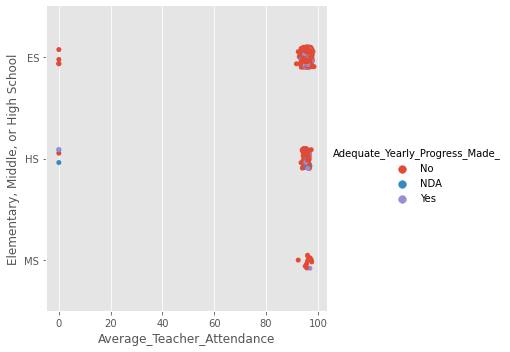

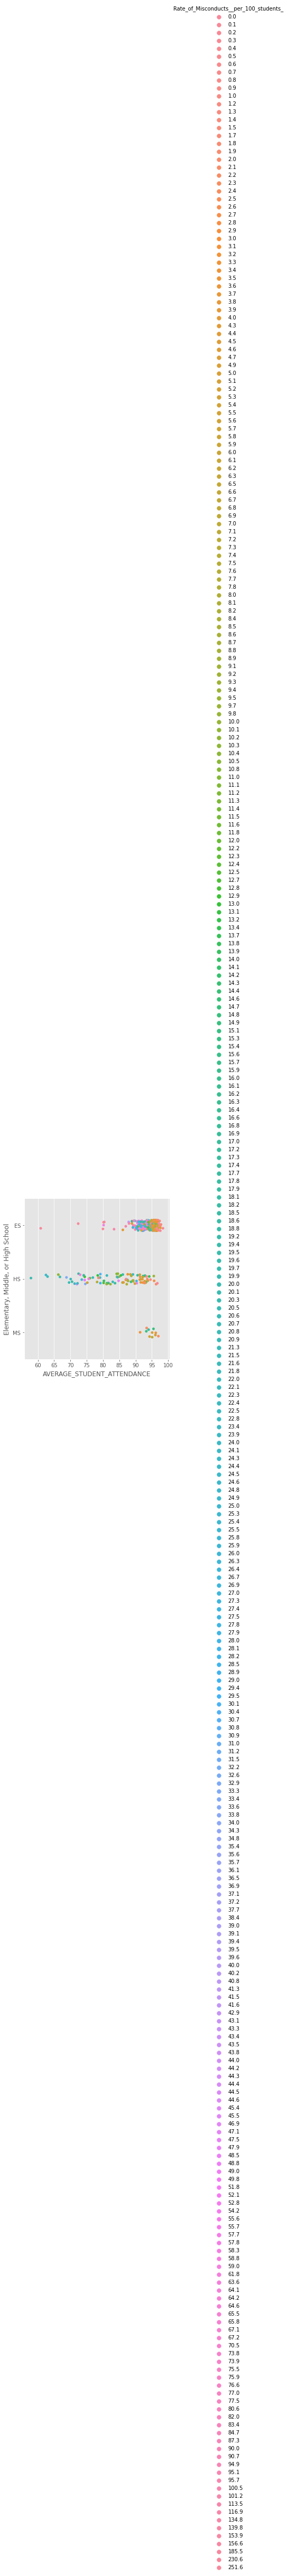

In [125]:
attendance_avg=df.groupby('Elementary, Middle, or High School')['AVERAGE_STUDENT_ATTENDANCE','Average_Teacher_Attendance'].mean().reset_index()
sns.catplot(data=df, x='Average_Teacher_Attendance', y='Elementary, Middle, or High School',hue='Adequate_Yearly_Progress_Made_')
sns.catplot(data=df, x='AVERAGE_STUDENT_ATTENDANCE', y='Elementary, Middle, or High School',hue='Rate_of_Misconducts__per_100_students_')

